In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mpl_toolkits.mplot3d

def init_x(step,start,end,dimension): #set the start&end coord, step size and dimension number pf input set
    xi=np.arange(start, end, step); x=xi #initialization of input xi for each dimension
    for i in range(dimension-1):
        x=np.vstack((np.around(x,decimals=9),np.around(xi,decimals=9))) #make x to d dimensions, from xi
    return x

def func1(x):
    alpha=1000 #set alpha
    dim=x.shape[0] #dimension number
    y=0
    for i in range(dim):
        y+=alpha**(i/(dim-1))*x[i]**2
    return y

x=init_x(0.001,-0.1,0.1,2)
#x=init_x(0.01,-2,2,2)
#print(x)

X1,X2 = np.meshgrid(x[0], x[1]) #generate all the data point
#print(X1,'\n',X2)

dtsize=X1.shape[0] #data point number
Y=np.zeros((dtsize,dtsize)) #initialize output results to 2D
for i in range(dtsize):
    for j in range(dtsize):
        X=np.vstack((np.around(X1[i,j],decimals=9),np.around(X2[i,j],decimals=9))) #choose every combination of 2D inputs
        Y[i,j]=func1(X) #store the results
print(Y)

[[10.01     10.009801 10.009604 ... 10.009409 10.009604 10.009801]
 [ 9.811     9.810801  9.810604 ...  9.810409  9.810604  9.810801]
 [ 9.614     9.613801  9.613604 ...  9.613409  9.613604  9.613801]
 ...
 [ 9.419     9.418801  9.418604 ...  9.418409  9.418604  9.418801]
 [ 9.614     9.613801  9.613604 ...  9.613409  9.613604  9.613801]
 [ 9.811     9.810801  9.810604 ...  9.810409  9.810604  9.810801]]


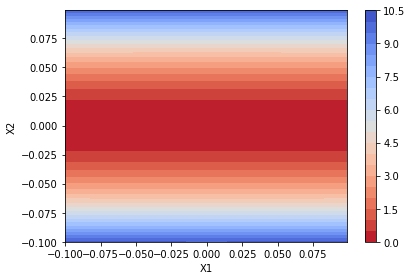

In [33]:
#plot in 2D with color
fig, ax = plt.subplots()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
Cset = plt.contourf(X1, X2, Y, levels=24, cmap='coolwarm_r')
#c_lv=[0,0.001,0.002,0.003,0.004,0.006,0.008,0.010]
#c_lv=10
#C = plt.contour(X1, X2, Y, levels=c_lv, colors='black')
#plt.clabel(C, inline=True, fontsize=10)
plt.colorbar(Cset)
plt.tight_layout()
plt.savefig('f1_2d.pdf')

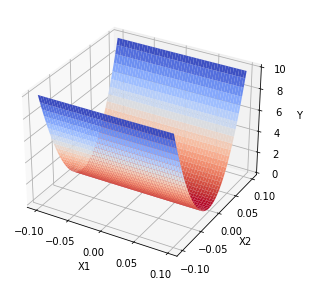

In [34]:
#plot in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,Y,cmap=plt.cm.coolwarm_r)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.tight_layout()
#ax.view_init(30, 30)
plt.show()
fig.savefig('f1_3d.pdf')

In [35]:
def func1_1(x):
    alpha=1000 #set alpha
    dim=x.shape[0] #dimension number
    dtsize=x.shape[1] #data point number
    result=np.zeros(dim)
    print(dim,dtsize)
    for i in range(dim):
        result[i]=2*(alpha**(i/(dim-1)))*x[i]
    return result

x=init_x(0.1,-15,15,3)
#print(x[0][19],x[1][223],x[2][165])
X=np.vstack((np.vstack((x[0,19],x[1,223])),x[2,165]))
print(X)

Y=func1_1(X)
#print(Y[0][19],Y[1][223],Y[2][165])
print(Y)

def func1_2(x):
    alpha=1000 #set alpha
    dim=x.shape[0] #dimension number
    dtsize=x.shape[1] #data point number
    result=np.zeros((dim,dim))
    for i in range(dim):
        result[i,i]=2*(alpha**(i/(dim-1)))
    return result

Y=func1_2(X)
print(Y)

[[-13.1]
 [  7.3]
 [  1.5]]
3 1
[ -26.2         461.69253838 3000.        ]
[[   2.           0.           0.       ]
 [   0.          63.2455532    0.       ]
 [   0.           0.        2000.       ]]


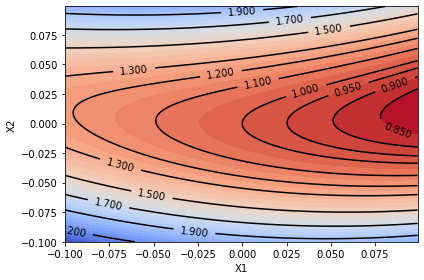

In [36]:
func2 = lambda x1,x2: (1-x1)**2 + 100*(x2-x1**2)**2;

Y=func2(X1,X2)
#plot in 2D with color
fig, ax = plt.subplots()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
line_lv = 33
c_lv = [0.85,0.9,0.95,1,1.1,1.2,1.3,1.5,1.7,1.9,2.2]
plt.contourf(X1, X2, Y, levels=line_lv, cmap='coolwarm_r')
C = plt.contour(X1, X2, Y, levels=c_lv, colors='black')
plt.clabel(C, inline=True, fontsize=10)
plt.tight_layout()
fig.savefig('f2_2d_1.pdf')

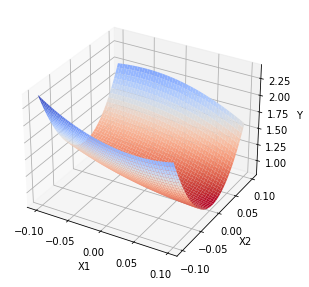

In [37]:
#plot in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,Y,cmap=plt.cm.coolwarm_r)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.tight_layout()
#ax.view_init(30, 30)
plt.show()
fig.savefig('f2_3d_1.pdf')

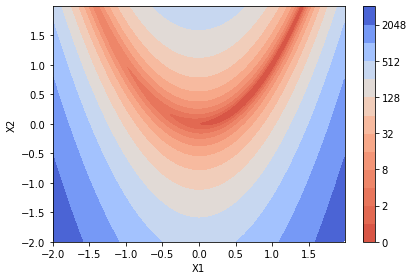

In [38]:
x=init_x(0.01,-2,2,2)
X1,X2 = np.meshgrid(x[0], x[1]) #generate all the data point
Y=func2(X1,X2)
#plot in 2D with color
fig, ax = plt.subplots()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
#lv=np.zeros(1)
#lv=np.append(lv,np.logspace(1,12,12,base=2))
lv=[0,1,2,4,8,16,32,64,128,256,512,1024,2048,3500]
Cset = plt.contourf(X1, X2, Y, levels=lv, norm=colors.PowerNorm(gamma=0.25), cmap='coolwarm_r')
#C = plt.contour(X1, X2, Y, levels=lv, colors='black')
#plt.clabel(C, inline=True, fontsize=7)
plt.colorbar(Cset)
plt.tight_layout()
fig.savefig('f2_2d_2.pdf')

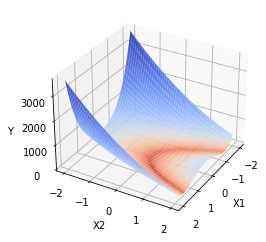

In [39]:
#plot in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,Y,norm=colors.PowerNorm(gamma=0.25),cmap=plt.cm.coolwarm_r)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(30, 30)
plt.show()
fig.savefig('f2_3d_2.pdf')

In [51]:
#func2 = lambda x1,x2: (1-x1)**2 + 100*(x2-x1**2)**2;
func2_1 = lambda x: (2*x[0]-2-400*x[0]*(x[1]-x[0]**2),200*(x[1]-x[0]**2));

#x=init_x(0.001,-0.1,0.1,2)
x=init_x(0.01,-2,2,2)
#print(x)

'''
X1,X2 = np.meshgrid(x[0], x[1]) #generate all the data point
#print(X1,'\n',X2)
dtsize=X1.shape[0] #data point number
dim=2
Y=np.zeros((dtsize,dtsize,dim)) #initialize output results to 2D
for i in range(dtsize):
    for j in range(dtsize):
        #X=np.vstack((np.around(X1[i,j],decimals=9),np.around(X2[i,j],decimals=9))) #choose every combination of 2D inputs
        temp=func2_1(X1[i,j],X2[i,j])
        for k in range(dim):
            Y[i,j,k]=temp[k] #store the results

#print(Y[:,:,0]) #partial x1
#print(Y[:,:,1]) #partial x2
'''
#print(x[0,297],x[1,58])
X=np.vstack((x[0,297],x[1,58]))
print(X)
Y=func2_1(X)
#print(Y[0][3],Y[1][3])
print(Y)

[[ 0.97]
 [-1.42]]
(array([915.9692]), array([-472.18]))


In [52]:
func2_2_det = lambda x: (2-400*x[1]+1200*x[0]**2)*200-(-400*x[0])**2;

func2_2 = lambda x: (2-400*x[1]+1200*x[0]**2,-400*x[0],-400*x[0],200);

print(X)
Y=func2_2(X)
#print(Y[0][3],Y[1][3],Y[2][3],Y[3])
print(Y)

[[ 0.97]
 [-1.42]]
(array([1699.08]), array([-388.]), array([-388.]), 200)


In [42]:
def func3(x):
    epsilon=10**(-16) #set epsilon
    return np.log(epsilon+func1(x))

x=init_x(0.001,-0.1,0.1,2)
#x=init_x(0.01,-2,2,2)

X1,X2 = np.meshgrid(x[0], x[1]) #generate all the data point

dtsize=X1.shape[0] #data point number
Y=np.zeros((dtsize,dtsize)) #initialize output results to 2D
for i in range(dtsize):
    for j in range(dtsize):
        X=np.vstack((np.around(X1[i,j],decimals=9),np.around(X2[i,j],decimals=9))) #choose every combination of 2D inputs
        Y[i,j]=func3(X) #store the results
print(Y)

[[2.30358459 2.30356471 2.30354503 ... 2.30352555 2.30354503 2.30356471]
 [2.28350421 2.28348392 2.28346384 ... 2.28344396 2.28346384 2.28348392]
 [2.26322037 2.26319967 2.26317918 ... 2.26315889 2.26317918 2.26319967]
 ...
 [2.24272893 2.2427078  2.24268688 ... 2.24266618 2.24268688 2.2427078 ]
 [2.26322037 2.26319967 2.26317918 ... 2.26315889 2.26317918 2.26319967]
 [2.28350421 2.28348392 2.28346384 ... 2.28344396 2.28346384 2.28348392]]


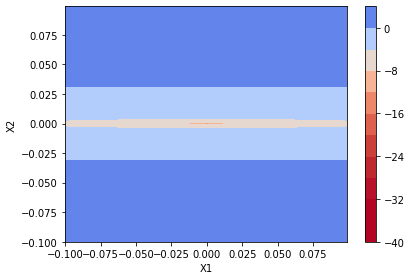

In [43]:
#plot in 2D with color
fig, ax = plt.subplots()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
lv=10
Cset = plt.contourf(X1, X2, Y, levels=lv, norm=colors.PowerNorm(gamma=3), cmap='coolwarm_r')
plt.colorbar(Cset)
plt.tight_layout()
fig.savefig('f3_2d.pdf')

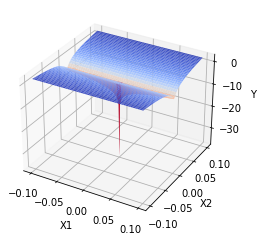

In [44]:
#plot in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,Y,norm=colors.PowerNorm(gamma=1.1),cmap=plt.cm.coolwarm_r)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
#ax.view_init(30, 30)
plt.show()
fig.savefig('f3_3d.pdf')

In [64]:
def func3_1(x):
    alpha=1000
    epsilon=10**(-16)
    dim=x.shape[0] #dimension number
    result=np.zeros(dim)
    for i in range(dim):
        result[i]=(2*alpha**(i/(dim-1))*x[i])/(epsilon+func1(x))
    return result

def func3_2(x):
    alpha=1000 #set alpha
    epsilon=10**(-16) #set epsilon
    dim=x.shape[0] #dimension number
    result=np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            a=alpha**((i+j)/(dim-1))
            if(i==j):
                result[i,j]=(2*a*(epsilon+func1(x))-(2*a*x[i])**2)/(epsilon+func1(x))**2
            else:
                result[i,j]=(-4*a*x[i]*x[j])/(epsilon+func1(x))**2
    return result

x=init_x(0.1,-15,15,3)
#print(x[0][19],x[1][223],x[2][165])
X=np.vstack((np.vstack((x[0,19],x[1,223])),x[2,165]))
print(X)

Y=func3_1(X)
print(Y)

Y=func3_2(X)
print(Y)

[[-13.1]
 [  7.3]
 [  1.5]]
[-0.00637968  0.11242182  0.73049794]
[[ 4.46298284e-04  7.17215436e-04  4.66034456e-03]
 [ 7.17215436e-04 -1.21516661e+01 -8.21239049e-02]
 [ 4.66034456e-03 -8.21239049e-02 -5.33140241e+05]]


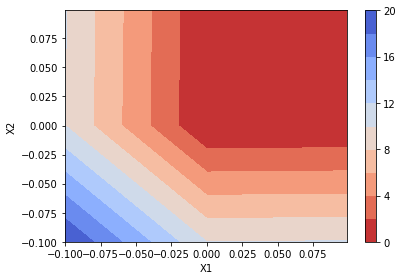

In [59]:
q=10**8
#funch = lambda x: np.log(1+np.exp(q*x))/q;

funch = lambda x: (np.log(1+np.exp(-np.absolute(q*x)))+np.maximum(q*x,0))/q
  
def func4(x):
    dim=x.shape[0] #dimension number
    y=0;
    for i in range(dim):
        y+=funch(x[i])+100*funch(-x[i])
    return y

def func5(x):
    dim=x.shape[0] #dimension number
    y=0;
    for i in range(dim):
        y+=funch(x[i])**2+100*funch(-x[i])**2
    return y

#x=init_x(0.01,-0.0000001,0.0000001,2)
x=init_x(0.001,-0.1,0.1,2)
X1,X2 = np.meshgrid(x[0], x[1]) #generate all the data point

dtsize=X1.shape[0] #data point number
Y=np.zeros((dtsize,dtsize)) #initialize output results to 2D
for i in range(dtsize):
    for j in range(dtsize):
        X=np.vstack((np.around(X1[i,j],decimals=9),np.around(X2[i,j],decimals=9))) #choose every combination of 2D inputs
        Y[i,j]=func4(X) #store the results
#print(Y)
#plot in 2D with color
fig, ax = plt.subplots()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
lv=10
Cset = plt.contourf(X1, X2, Y, levels=lv, norm=colors.PowerNorm(gamma=1), cmap='coolwarm_r')
plt.colorbar(Cset)
plt.tight_layout()
fig.savefig('f4_2d.pdf')

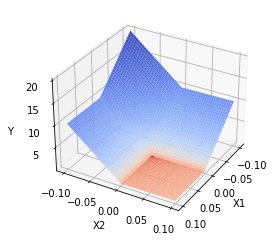

In [60]:
#plot in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,Y,norm=colors.PowerNorm(gamma=0.25),cmap=plt.cm.coolwarm_r)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(30, 30)
plt.show()
fig.savefig('f4_3d.pdf')

In [99]:
def func4_1(x):
    q=10**8
    dim=x.shape[0] #dimension number
    result=np.zeros(dim)
    for i in range(dim):
        result[i]=(np.exp(q*x[i]))/(1+np.exp(q*x[i]))-100*(np.exp(-q*x[i])/(1+np.exp(-q*x[i])))
    return result
    
def func4_2(x):
    q=10**8
    dim=x.shape[0] #dimension number
    result=np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            if(i==j):
                result[i,j]=(101*q*np.exp(-q*x[i]))/(1+np.exp(-q*x[i]))**2
            else:
                result[i,j]=0
    return result

x=init_x(0.00000001,-0.0000015,0.0000015,3)
#print(x[0][19],x[1][223],x[2][165])
X=np.vstack((np.vstack((x[0,19],x[1,223])),x[2,165]))
print(X)

Y=func4_1(X)
print(Y)

Y=func4_2(X)
print(Y)


[[-1.31e-06]
 [ 7.30e-07]
 [ 1.50e-07]]
[-100.           1.           0.9999691]
[[1.29343392e-47 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.99905248e-22 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.08961155e+03]]


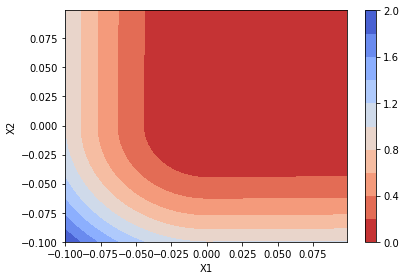

In [61]:
Y=np.zeros((dtsize,dtsize)) #initialize output results to 2D
for i in range(dtsize):
    for j in range(dtsize):
        X=np.vstack((np.around(X1[i,j],decimals=9),np.around(X2[i,j],decimals=9))) #choose every combination of 2D inputs
        Y[i,j]=func5(X) #store the results
#print(Y)
#plot in 2D with color
fig, ax = plt.subplots()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
lv=10
Cset = plt.contourf(X1, X2, Y, levels=lv, norm=colors.PowerNorm(gamma=1), cmap='coolwarm_r')
plt.colorbar(Cset)
plt.tight_layout()
fig.savefig('f5_2d.pdf')

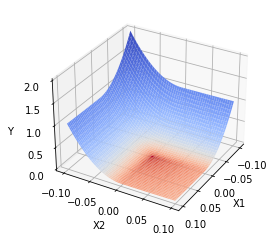

In [62]:
#plot in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,Y,norm=colors.PowerNorm(gamma=0.25),cmap=plt.cm.coolwarm_r)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(30, 30)
plt.show()
fig.savefig('f5_3d.pdf')